<a href="https://colab.research.google.com/github/doxxa11/Submission-Belajar-Machine-Learning-untuk-Pemula-Dicoding/blob/main/Dicoding_Klasifikasi_Gambar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Klasifikasi Gambar dengan 3 Kategori**

Submission Proyek Akhir: Klasifikasi Gambar atas arahan Dicoding

oleh: Ardio Pratama Putra


##**1. Melakukan instalasi split-folders**

Split Folder adalah depedensi yang mempermudah untuk membagi folder kategorikal seperti dataset pada submission ini yaitu rocks, paper, scissors. 

Split Folder juga memiliki kelebihan dimana dapat membagi data training dan data validation secara langsun dengan parameter yang diinginkan, dalam klasifikasi ini menggunakan ratio 60:40 (sesuai arahan Dicoding)

In [ ]:
!pip install split-folders tqdm

##**2.Memasukan depedensi yang akan digunakan**

Pada klasifikasi ini, terdapat depedensi yang akan digunakan dimulai dari zipfile yang berguna untuk mengekstrak zipfile yang nanti didownload, split folder untuk membagi data ekstrak, dan masih banyak lagi.

In [ ]:
import tensorflow as tf
import zipfile, os
import splitfolders
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from google.colab import files
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from tensorflow.keras.optimizers import RMSprop

##**3.Unduh Dataset**

Mengunduh dataset sesuai arahan Dicoding.

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-05-22 05:56:53--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  7.56MB/s    in 72s     

2021-05-22 05:58:06 (4.28 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



##**4.Ekstraksi Zip File dataset agar dapat diakses**

Karena dataset masih berada didalam zipfile, maka perlu dikeluarkan terlebih dahulu dari zipfile agar dataset dapat diolah lebih lanjut.

In [ ]:
path_zip = '/content/rockpaperscissors.zip'
unzip = zipfile.ZipFile(path_zip,'r')
unzip.extractall('/content')
unzip.close()

##**5.Memisahkan Folder Datasets**
Karena hasil ekstrak memiliki 3 folder berupa foto tangan mengepal, pose gunting, dan membuka, maka perlu kita pisahkan menjadi folder training dan folder validation.

In [ ]:
splitfolders.ratio('/content/rockpaperscissors/rps-cv-images', output='/content/rockpaperscissors/data', 
                   seed=1337, ratio=(.6, .4), group_prefix=None)
#splitfolders.fixed('/content/rockpaperscissors/rps-cv-images', output='/content/rockpaperscissors/data', 
#                   seed=1337, fixed=(100, 100), oversample = False, group_prefix=None)

Copying files: 2188 files [00:00, 3362.61 files/s]


##**6.Mendeklarasikan folder sesuai kategori**

Folder training dan Folder validation masing masing berisikan foto tangan mengepal, pose gunting, dan membuka sehingga masing masing dideklarasikan ke variabel agar lebih mudah dalam memanggil dataset yang nantinya akan digunakan.

In [ ]:
dir_data = '/content/rockpaperscissors/data'
dir_train = os.path.join(dir_data, 'train')
dir_val = os.path.join(dir_data, 'val')

In [ ]:
train_rock = os.path.join(dir_train, 'rock')
train_paper = os.path.join(dir_train, 'paper')
train_scissors = os.path.join(dir_train, 'scissors')

val_rock = os.path.join(dir_val, 'rock')
val_paper = os.path.join(dir_val, 'paper')
val_scissors = os.path.join(dir_val, 'scissors')

##**7.Augmentasi Gambar**

Augmentasi gambar dilakukan dengan bantuan objek ImageDataGenerator dimana training set dan validation set dipersiapkan untuk model yang akan dipakai kedepannya.

In [ ]:
train_imggen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=20,
                                  horizontal_flip=True,
                                  shear_range=0.2,
                                  zoom_range=0.2)

val_imggen = ImageDataGenerator(rescale=1./255,
                                rotation_range=20,
                                horizontal_flip=True,
                                shear_range=0.2,
                                zoom_range=0.2)

In [ ]:
train_gen = train_imggen.flow_from_directory(dir_train,
                                             target_size=(150,150),
                                             batch_size=32,
                                             class_mode='categorical',
                                             shuffle=True,
                                             seed=42,
                                             color_mode='rgb')
val_gen = val_imggen.flow_from_directory(dir_val,
                                         target_size=(150,150),
                                         batch_size=32,
                                         class_mode='categorical',
                                         shuffle=True,
                                         seed=42,
                                         color_mode='rgb')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


#**8.Membuat Model CNN untuk klasifikasi gambar**

Dalam model ini menggunakan dependensi dari tensorflow berupa Sequential, Conv2D, MaxPooling2D, Flatten, Dense, dan Activation

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

##**9. Melakukan Compile dan Pelatihan Dataset**

Dalam compiling, optimizer menggunakan RMSprop dan loss menggunakan categorical_crossenthropy karena data kategori yang digunakan lebih dari 2 kategori.

In [ ]:
model.compile(optimizer='RMSprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_stat = model.fit(train_gen,
                       steps_per_epoch=32,
                       epochs=20,
                       validation_data=val_gen,
                       validation_steps=5,
                       verbose=2)

Epoch 1/20
32/32 - 48s - loss: 1.2092 - accuracy: 0.4180 - val_loss: 0.8180 - val_accuracy: 0.7625
Epoch 2/20
32/32 - 46s - loss: 0.7440 - accuracy: 0.6963 - val_loss: 0.4288 - val_accuracy: 0.8500
Epoch 3/20
32/32 - 46s - loss: 0.4806 - accuracy: 0.8320 - val_loss: 0.3819 - val_accuracy: 0.8625
Epoch 4/20
32/32 - 46s - loss: 0.4030 - accuracy: 0.8613 - val_loss: 0.5057 - val_accuracy: 0.7937
Epoch 5/20
32/32 - 46s - loss: 0.2986 - accuracy: 0.8936 - val_loss: 0.2569 - val_accuracy: 0.9062
Epoch 6/20
32/32 - 46s - loss: 0.2904 - accuracy: 0.9092 - val_loss: 0.2954 - val_accuracy: 0.9062
Epoch 7/20
32/32 - 46s - loss: 0.1898 - accuracy: 0.9355 - val_loss: 0.1140 - val_accuracy: 0.9750
Epoch 8/20
32/32 - 46s - loss: 0.1262 - accuracy: 0.9580 - val_loss: 0.1640 - val_accuracy: 0.9500
Epoch 9/20
32/32 - 46s - loss: 0.1749 - accuracy: 0.9385 - val_loss: 0.1270 - val_accuracy: 0.9500
Epoch 10/20
32/32 - 46s - loss: 0.1939 - accuracy: 0.9346 - val_loss: 0.1473 - val_accuracy: 0.9438
Epoch 11/

##**10.Melihat Evaluasi dari Model**

Setelah dilakukan compile dan pelatihan, alangkah baiknya melihat hasil akurasi ahkir dari masing data data agar dapat melihat keefektifitasan model.

In [ ]:
acctrain = model.evaluate(train_gen)
print('Accuracy: ' + str(acctrain[1]))
accval= model.evaluate(val_gen)
print('Validation Accuracy: ' + str(accval[1]))

41/41 [==============================] - 21s 499ms/step - loss: 0.0473 - accuracy: 0.9848
Accuracy: 0.9847561120986938
28/28 [==============================] - 14s 484ms/step - loss: 0.0923 - accuracy: 0.9715
Validation Accuracy: 0.9714611768722534


##**11.Visualisasi Data Akurasi dan Loss**

Setelah melihat evaluasi model, perlu untuk melakukan visualisasi data untuk melakukan pengecekan apakah data sudah good fit atau mungkin underfitting atau overfitting.

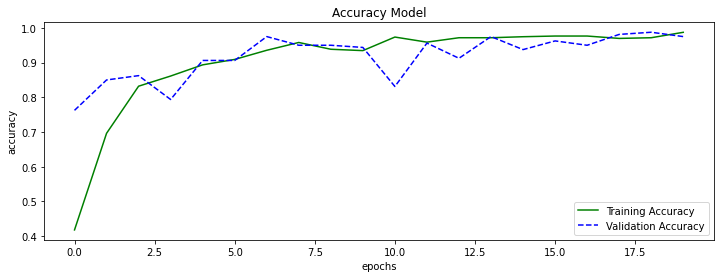

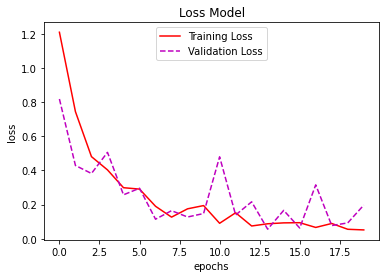

In [ ]:
visacc = model_stat.history['accuracy']
visloss = model_stat.history['loss']
visvalacc = model_stat.history['val_accuracy']
visvalloss = model_stat.history['val_loss']

plt.figure(figsize=(12,4))

plt.plot(visacc, 'g-', label= 'Training Accuracy')
plt.plot(visvalacc, 'b--', label= 'Validation Accuracy')
plt.title('Accuracy Model')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(visloss, 'r-', label='Training Loss')
plt.plot(visvalloss, 'm--', label='Validation Loss')
plt.title('Loss Model')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(loc='upper center')
plt.show()

##**12. Uji kelayakan Model dengan cara Prediksi Unggahan Gambar Lokal**

Untuk mengetest apakah model data berjalan dengan baik, bisa dilakukan dengan mengunggah gambar atau foto yang berbeda dengan folder dataset yang sudah dilatih tadi.

Saving 00nKV8oHuTGi20gq.png to 00nKV8oHuTGi20gq.png
00nKV8oHuTGi20gq.png
It is Rock !


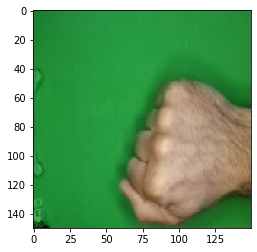

In [ ]:
localupload = files.upload()

for filepred in localupload.keys():
  imgpred = image.load_img(filepred, target_size=(150,150))
  imgplt = plt.imshow(imgpred)
  x = image.img_to_array(imgpred)
  x = np.expand_dims(x,axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  print(filepred)
  if classes[0,0]==1.0:
    print('It is Paper !')
  elif classes[0,1]==1.0:
    print('It is Rock !')
  else:
    print('It is Scissors !')